<a href="https://colab.research.google.com/github/ghazaletlbn/machinelearning/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sales_train =  pd.read_csv('drive/My Drive/dataset/hw3/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
item_categories = pd.read_csv('drive/My Drive/dataset/hw3/item_categories.csv')
items = pd.read_csv('drive/My Drive/dataset/hw3/items.csv')
shops = pd.read_csv('drive/My Drive/dataset/hw3/shops.csv')
test = pd.read_csv('drive/My Drive/dataset/hw3/test.csv')

In [ ]:
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,2015-10-10,33,25,7409,299.0,1.0
2935845,2015-10-09,33,25,7460,299.0,1.0
2935846,2015-10-14,33,25,7459,349.0,1.0
2935847,2015-10-22,33,25,7440,299.0,1.0
2935848,2015-10-03,33,25,7460,299.0,1.0


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
sales_train['date_block_num'] =sales_train['date_block_num'].map(str)
data =sales_train.groupby(['date_block_num','item_id','shop_id']).sum().reset_index()
del data['item_price']
data.tail(20)


,date_block_num,item_id,shop_id,item_cnt_day
1609104,9,22167,18,1.0
1609105,9,22167,21,2.0
1609106,9,22167,22,58.0
1609107,9,22167,24,3.0
1609108,9,22167,25,9.0
1609109,9,22167,26,3.0
1609110,9,22167,27,9.0
1609111,9,22167,28,3.0
1609112,9,22167,29,4.0
1609113,9,22167,30,1.0


In [ ]:
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date_block_num', values = 'item_cnt_day', fill_value = 0).reset_index()
data.head(20)

date_block_num,item_id,shop_id,0,1,10,11,12,13,14,15,...,30,31,32,33,4,5,6,7,8,9
0,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(424124, 36)

In [ ]:
test = pd.merge(test, data, on = [ 'shop_id','item_id'], how = 'left')
test.fillna(0, inplace = True)
test.head()

,ID,shop_id,item_id,0,1,10,11,12,13,14,...,30,31,32,33,4,5,6,7,8,9
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train = test.drop(['33', 'item_id', 'shop_id'], axis = 1)
y_train = test['33']
x_train.head()

,ID,0,1,10,11,12,13,14,15,16,...,3,30,31,32,4,5,6,7,8,9
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test = test.drop(['0','item_id', 'shop_id'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 33
Feature names seen at fit time, yet now missing:
- 0



array([0.33901781, 0.12124718, 0.86698046, ..., 0.44305603, 0.04595972,
       0.17137592])

In [ ]:
preds = pd.DataFrame(y_pred, columns=['34_month_pred'])
preds.head()

,34_month_pred
0,0.339018
1,0.121247
2,0.866980
3,0.173366
4,0.121246


In [ ]:
x_test_new = x_train.iloc[:1000,:]
explainer = shap.Explainer(regressor.predict, x_test_new)

In [ ]:
shap_values = explainer(x_test_new)

Permutation explainer: 1001it [00:32, 22.12it/s]                         


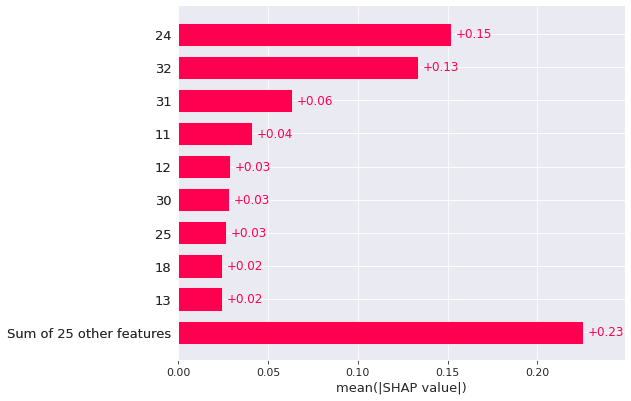

In [ ]:
shap.plots.bar(shap_values)

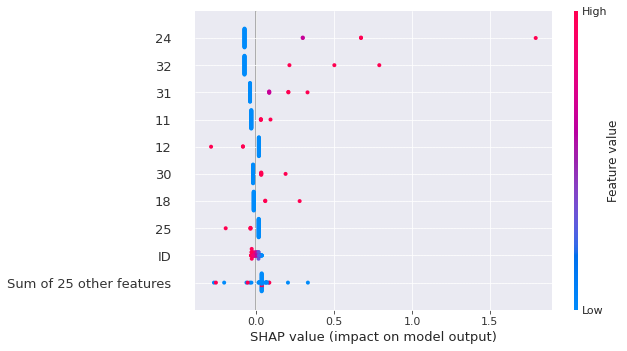

In [ ]:
shap.plots.beeswarm(shap_values.sample(50))

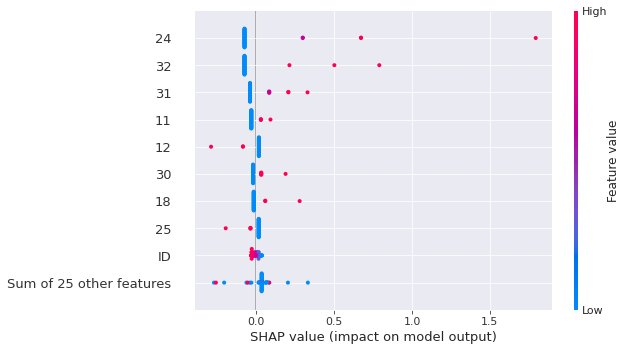

In [ ]:
shap.plots.beeswarm(shap_values.sample(50))

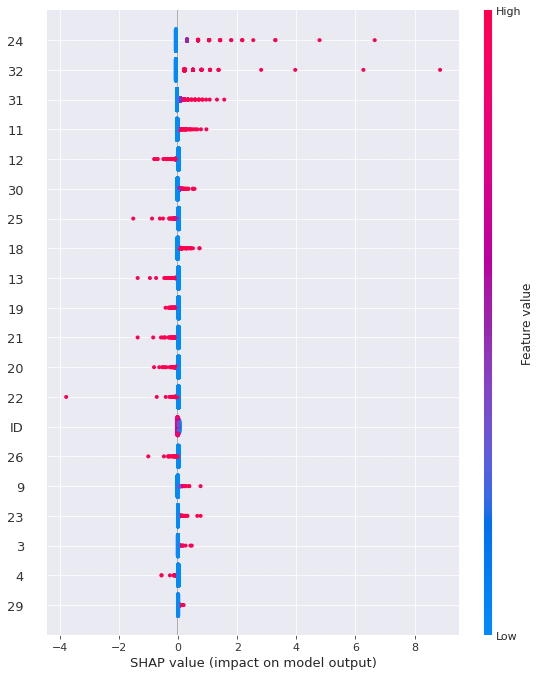

In [ ]:
shap.summary_plot(shap_values)
